In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

#Seteamos una semilla en la que vimos que los W1, W2, b1, b2 que inicializabamos random ayudaban a que se
#llegue a un mejor ajuste de los parametros. Asi, ustedes posian ejecutar el codigo y ver los mismos
#resultados que vemos nosotros, que son con los que vamos a trabajar.
np.random.seed(55)

#Inicializacion de pesos random
W1 = np.random.random((5,6))
b1 = np.random.random((5,1))

W2 = np.random.random((1,5))
b2 = np.random.random((1,1))

#Dado que entrenamos con los primeros 315 datos, creamos 2 dataset
#datos_entrenamiento, corresponde a dichos datos
entrenamiento = pd.read_csv("datos_entrenamiento.csv", header = 0)

#asignacion de variables
x1_e = entrenamiento["X1 transaction date"]
x2_e = entrenamiento["X2 house age"]
x3_e = entrenamiento["X3 distance to the nearest MRT station"]
x4_e = entrenamiento["X4 number of convenience stores"]
x5_e = entrenamiento["X5 latitude"]
x6_e = entrenamiento["X6 longitude"]
y_e = entrenamiento["Y house price of unit area"]

#asignacion
y_entrenamiento = y_e

#creo la matriz de entrenamiento
# X_ENTRENAMIENTO =[|  |   |  |  |  |]
#                  [X1 X2 X3 X4 X5 X6]
#                  [|  |   |  |  |  |]

x_entrenamiento = np.transpose(np.vstack([x1_e, x2_e, x3_e, x4_e, x5_e, x6_e]))

#Dado que hacemos el test con los ultimos 100 datos, creamos 2 dataset
#datos_test, corresponde a dichos datos
test = pd.read_csv("datos_test.csv", header = 0)

#repito lo anterior pero con los datos del test
x1_t = test["X1 transaction date"]
x2_t = test["X2 house age"]
x3_t = test["X3 distance to the nearest MRT station"]
x4_t = test["X4 number of convenience stores"]
x5_t = test["X5 latitude"]
x6_t = test["X6 longitude"]
y_t = test["Y house price of unit area"]

y_test = y_t

x_test = np.transpose(np.vstack([x1_t, x2_t, x3_t, x4_t, x5_t, x6_t]))


In [ ]:
'''Implementar el método forward() de la clase NeuralNetwork. Este método devuelve el resultado de evaluar la función fθ. Las dimensiones de las matrices en juego están
predefinidas e inicializadas en el código de base.'''

#Todo lo que elejimos trasponer en este ejercicio es porque numpy a ciertos vectores o matrices de dimensiones
#mx1 o mxn respectivamente, los escribia como 1xm o nxm
#todo lo que esta traspuesto no fue elegido al azar,
#es para hacer la multiplicacion de forma correcta, sin trasponerlos daba error de dimensiones
def forward(W1,b1,W2,b2,x_i):


    #Multiplico la matriz de pesos por la matriz de datos de entrenamiento
    # W1*X + b1
    res = np.dot(W1,x_i) + np.array(np.transpose(b1))

    #Aplico la funcion ReLU a cada elemento de la matriz
    #ReLU(W1*X + b1)
    for i in range(len(res[0])):
        res[0][i] = ReLU(res[0][i])

    #W2.ReLU(W1*X + b1) + b2
    res2 = np.dot(W2,np.transpose(res)) + b2
    #Se formaba una lista de 1 elemento con el valor, por eso los indices
    return res2[0][0]

def ReLU(x):
    return max(0,x)

#calcula la L que es parametro que queremos minimizar
def funcion_objetivo(W1,b1,W2,b2,x_i, y_i):
    #Calcula el y estimado con los parametros W1,b1,W2,b2,x_i
    y_est = forward(W1,b1,W2,b2,x_i)
    #devuelve el ECM con la formula provista
    return 1/2 * (y_est - y_i)**2




In [ ]:
'''Implementar el método numerical_gradient() que computa la derivada parcial de
la función de perdida con respecto a cada uno de los parámetros de la red.'''

def numerical_gradient(W1,b1,W2,b2, x_i, y_i, epsilon):

    #derivada parcial de L manteniendo todos los parametros como constantes excepto W1
    deriv_W1 = np.zeros((5,6))
    for i in range(len(W1)):
        for j in range(len(W1[0])):

            #creo copia de W1 para ir modificando los parametros individualmente y ver como cambia su comportamiento
            W1_mod_SUM = np.copy(W1)
            #le sumo epsilon a w1
            W1_mod_SUM[i][j] = W1[i][j]+epsilon
            W1_mas_epsilon = funcion_objetivo(W1_mod_SUM,b1,W2,b2,x_i, y_i) # [W1+ϵ, b1, W2, b2]

            W1_mod_RES= np.copy(W1)
            #le resto epsilon a w1
            W1_mod_RES[i][j] = W1[i][j]-epsilon
            W1_menos_epsilon = funcion_objetivo(W1_mod_RES,b1,W2,b2,x_i, y_i) # [W1-ϵ, b1, W2, b2]
            #devuelvo la resta entre ambos / 2*epsilon  -> la manera de calcular la derivada parcial con respecto a W1
            deriv_W1[i][j] = (W1_mas_epsilon - W1_menos_epsilon) / (2*epsilon)

    #derivada parcial de L manteniendo todos los parametros como constantes excepto b1
    deriv_b1 = np.zeros((5,1))

    for i in range(len(b1)):
        for j in range(len(b1[0])):

            b1_mod_SUM = np.copy(b1)
            #le sumo epsilon a b1
            b1_mod_SUM[i][j] = b1[i][j]+epsilon
            b1_mas_epsilon = funcion_objetivo(W1,b1_mod_SUM,W2,b2,x_i, y_i) # [W1, b1+ϵ, W2, b2]

            b1_mod_RES = np.copy(b1)
            #le resto epsilon a b1
            b1_mod_RES[i][j] = b1[i][j]-epsilon
            b1_menos_epsilon = funcion_objetivo(W1,b1_mod_RES,W2,b2,x_i, y_i) # [W1, b1-ϵ, W2, b2]
            #devuelvo la resta entre ambos / 2*epsilon -> la manera de calcular la derivada parcial con respecto a b1
            deriv_b1[i][j] = (b1_mas_epsilon - b1_menos_epsilon) / (2*epsilon)

    #derivada parcial de L manteniendo todos los parametros como constantes excepto W2
    deriv_W2 = np.zeros((1,5))
    for i in range(len(W2)):
        for j in range(len(W2[0])):

            W2_mod_SUM = np.copy(W2)
            #le sumo epsilon a W2
            W2_mod_SUM[i][j] = W2[i][j]+epsilon
            W2_mas_epsilon = funcion_objetivo(W1,b1,W2_mod_SUM,b2,x_i, y_i) # [W1, b1, W2+ϵ, b2]


            W2_mod_RES = np.copy(W2)
             #le resto epsilon a W2
            W2_mod_RES[i][j] = W2[i][j]-epsilon
            W2_menos_epsilon = funcion_objetivo(W1,b1,W2_mod_RES,b2,x_i, y_i) # [W1, b1, W2-ϵ, b2]
            #devuelvo la resta entre ambos / 2* epsilon -> la manera de calcular la derivada parcial con respecto a w2
            deriv_W2[i][j] = (W2_mas_epsilon - W2_menos_epsilon) / (2*epsilon)


    #derivada parcial de L manteniendo todos los parametros como constantes excepto b2
    b2_mas_epsilon = funcion_objetivo(W1,b1,W2,b2+epsilon,x_i,y_i) # [W1, b1, W2, b2+ϵ]
    b2_menos_epsilon = funcion_objetivo(W1,b1,W2,b2-epsilon,x_i,y_i) # [W1, b1, W2, b2-ϵ]
    #devuelvo la resta entre ambos / 2* epsilon -> la manera de calcular la derivada parcial con respecto a b2
    deriv_b2 = (b2_mas_epsilon - b2_menos_epsilon) / (2*epsilon)

    derivadas_parciales = [deriv_W1, deriv_b1, deriv_W2, deriv_b2]

    return derivadas_parciales

In [ ]:
#funcion fit y loop de entrenamiento
#Resta a cada uno de los parametros las derivadas calculadas en numeral_gradient
def fit(x, y, W1, W2, b1, b2, learning_rate, epochs):
    loss_acum = []
    epsilon = 0.01

    # por cada epochs le sumandoles la derivada parcial a cada uno de los parametros
    for j in range(epochs):
        loss_i = 0
        W1_res = np.zeros_like(W1)
        W2_res = np.zeros_like(W2)
        b1_res = np.zeros_like(b1)
        b2_res = 0

        for i in range(x.shape[0]):

            y_est = forward(W1, b1, W2, b2, x[i])

            if abs(y_est-y[i]) < 0.000005:
                return loss_acum, W1, b1, W2, b2

            #calculo la loss como el parametro a minimizar y veo cuanto da con respescto a lass distintas iteraciones
            loss_i += funcion_objetivo(W1, b1, W2, b2, x[i], y[i])

            #calculo la derivada parcial de cada uno de sus parametros usando numerical gradient
            deriv_W1, deriv_b1, deriv_W2, deriv_b2 = numerical_gradient(W1, b1, W2, b2, x[i], y[i], epsilon)

            #le sumo a cada uno los valores de esas derivadas
            W1_res += deriv_W1
            b1_res += deriv_b1
            W2_res += deriv_W2
            b2_res += deriv_b2

        #normaizo los vectores de resultado luego de que termine de actualizarse todos los parametros en un epoch
        W1_res = np.divide(W1_res, x.shape[0])
        b1_res = np.divide(b1_res, x.shape[0])
        W2_res = np.divide(W2_res, x.shape[0])
        b2_res = np.divide(b2_res, x.shape[0])

        #a el resultado final le resto el b1 por un learning rate chico (proporcion)
        W1 -= learning_rate * W1_res
        b1 -= learning_rate * b1_res
        W2 -= learning_rate * W2_res
        b2 -= learning_rate * b2_res

        #agrego al vector de peridas el valor que dio en esta oteracion (deberia de ir minimizando)
        loss_acum.append(loss_i / x.shape[0])

    return loss_acum, W1, b1, W2, b2


loss, W1,b1, W2, b2 = fit(x_entrenamiento, y_entrenamiento, W1,W2,b1,b2, learning_rate=0.01, epochs=1000)


[0.059067361207815555, 0.03817533102797852, 0.05863407419248384, 0.041623043798431424, 0.07032544466831717, 0.04589836295501742, 0.05373935654522801, 0.0460883775621815, 0.04337759185155653, 0.05109740977116724, 0.03987169334574964, 0.06309770436501498, 0.0631502523209692, 0.0517164665750777, 0.041978511695221224, 0.05380918927163075, 0.0279493421617645, 0.06645631682429642, 0.03359494690827865, 0.05603735910913224, 0.04807857284140101, 0.051203312494095043, 0.04398377894975039, 0.04619734410669618, 0.06250409538034155, 0.05909522862653928, 0.029133579180258613, 0.04332550492061323, 0.06783414244840827, 0.0621870466873686, 0.051048100680836414, 0.04949556408418281, 0.03935967392698962, 0.09656473742309185, 0.05974805749995945, 0.05603735910913224, 0.05139828725745549, 0.04571084932477987, 0.052836902536785184, 0.04578335057900582, 0.0391670675051736, 0.0575180757968522, 0.0449666942188723, 0.06918861963175381, 0.062288107712080085, 0.03700892012572509, 0.06705832449146934, 0.0631460694

<ipython-input-60-55398a7db5d5>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_est, '-r', label='Y estimada', color = 'red')
<ipython-input-60-55398a7db5d5>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test, '-b', label='Y real', color = 'blue')


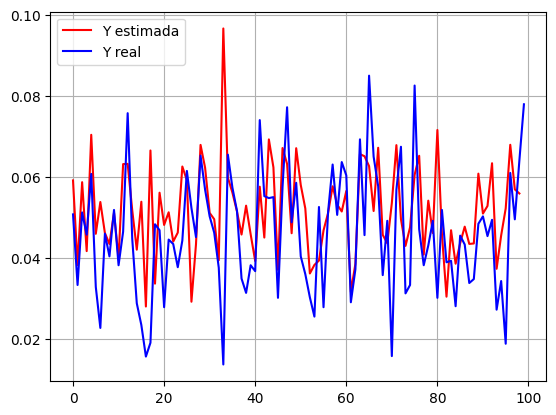

In [ ]:
#Calculo las estimaciones de y para cada x de entrenamiento
y_est = []

for i in range(99):
    y_est_i = forward(W1,b1,W2,b2,x_test[i])
    y_est.append(y_est_i)

print(y_est)

plt.plot(y_est, '-r', label='Y estimada', color = 'red')
plt.plot(y_test, '-b', label='Y real', color = 'blue')
plt.legend(loc='upper left')
plt.grid()

plt.show()

Podemos ver que el $y$ estimado usando los parametros $W1$, $b1$, $W2$, $b2$ a los que llego nuestro entrenamiento con los datos de las filas 0 a 314 se ajusta bien a los datos usados para el test, los de las filas 315 a 414.

La conclusión es que con los pasametros $learning rate = 0.01$ y $epochs = 1000$, y dados los datos random de entrada $W1$,$W2$,$b1$,$b2$, el modelo logro un correcto procesamiento de los datos ya que el output aplicado a otros datos se ajusta bien.

En nuestra red neuronal, los input fueron los $x_{i}$ tales que i va de 0 a 314. Entre la capa de input y la de output se realizo un entrenamiento de la red para que vaya ajustando los parametros $W1$, $b1$, $W2$, $b2$ que en una primer instancia fueron generados aleatoriamente y luego ajustados hasta llegar a los finales. Los outputs de $W1$, $b1$, $W2$, $b2$ fueron aplicados a los $x_{i}$ que van de 315 a 414 y el resultado se plasma en el grafico.

Demuestra que las respectivas matrices y vectores resultantes posteriores al entrenamiento logran predecir el valor de una casa basada en los 6 factores dados en el dataset.

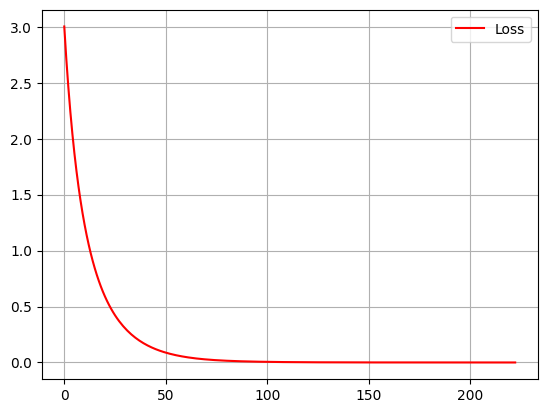

In [ ]:
plt.plot(loss, label='Loss', color = 'red')
plt.legend(loc='upper right')
plt.grid()

La loss (pérdida) en una red neuronal es una medida que indica cuánto difiere la salida predicha de la red neuronal de la salida deseada o esperada. Al minimizar la pérdida, se logra un mejor ajuste del modelo a los datos de entrenamiento y, por lo tanto, se espera que el modelo se aproxime mejor a nuevos datos. En el grafico, podemos ver como a medida que vamos actualizando los valores de los parametros en cada iteracion, el valor de la funcion de perdida (hecha en funcion objetivo) disminuye hasta llegar de forma asintotica al cero. Esto indica que el modelo está haciendo predicciones muy precisas y cercanas a los valores reales, que es una señal positiva y sugiere que el modelo ha aprendido bien los patrones en los datos de entrenamiento.